# Imports

In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logictensornetworks as ltn
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

# Dataset exploration

In [14]:
start_time = time.time()
df = pd.read_csv("/Users/eduard.hogea/Documents/Facultate/Internship/explorare/KNN99---LTN/datesets/KDD99/kddcup99.csv", skipinitialspace = True)

In [4]:
df.shape #numar de linii si coloane

(494020, 42)

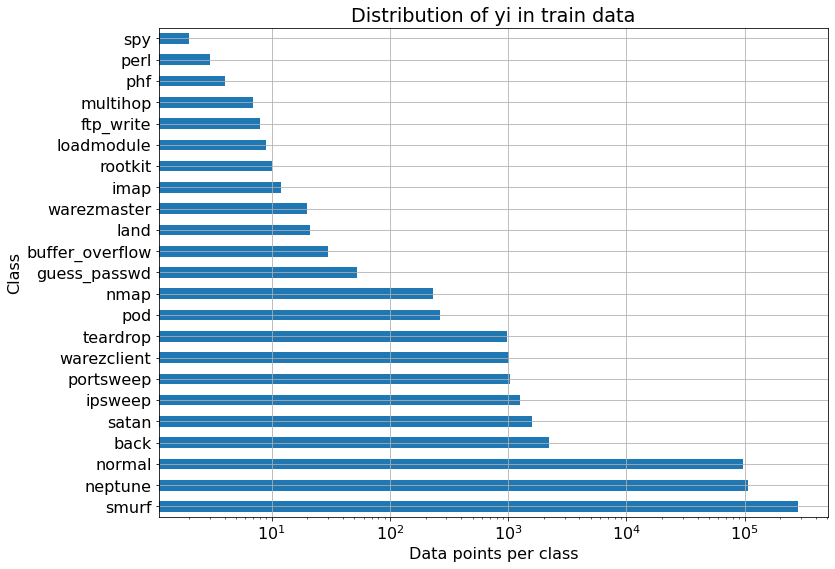

In [15]:
plt.figure(figsize=(12,9))
plt.rcParams.update({'font.size': 16})
class_distribution = df['label'].value_counts()
class_distribution.plot(kind='barh')
plt.xlabel('Data points per class')
plt.ylabel('Class')
plt.title('Distribution of yi in train data')
plt.grid()
#plt.xlim([0, 100])
plt.xscale('log')
plt.show()

In [11]:
df.drop_duplicates(keep= 'first', inplace=True) #eliminarea dublurilor liniilor
print('Null values in dataset are',len(df[df.isnull().any(1)]))
df.shape

Null values in dataset are 0


(145585, 42)

In [26]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,145585.000000,1.455850e+05,1.455850e+05,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,...,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000
mean,132.026088,7.995752e+03,2.859788e+03,0.000137,0.020201,0.000048,0.100175,0.000515,0.491486,0.026177,...,181.469423,129.935570,0.553226,0.061389,0.092826,0.019048,0.291599,0.290980,0.110464,0.107676
std,1224.161209,1.820390e+06,6.081000e+04,0.011720,0.239369,0.010150,1.426803,0.028586,0.499929,3.311384,...,99.097396,114.714717,0.456236,0.147021,0.241124,0.060410,0.452493,0.453448,0.306098,0.304221
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,78.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.880000e+02,1.164000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.030000,0.020000,1.000000,1.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df = df.sample(frac=1) #shuffle

In [28]:
df.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
147986,0,tcp,ftp_data,SF,8325,0,0,0,0,0,...,41,0.49,0.04,0.49,0.05,0.0,0.0,0.0,0.0,normal
376663,0,tcp,private,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.0,1.0,0.0,0.0,neptune
467011,0,tcp,private,REJ,0,0,0,0,0,0,...,4,0.02,0.07,0.00,0.00,0.0,0.0,1.0,1.0,neptune
4289,0,tcp,smtp,SF,747,325,0,0,0,0,...,113,0.90,0.02,0.01,0.00,0.0,0.0,0.0,0.0,normal
356000,0,tcp,private,S0,0,0,0,0,0,0,...,14,0.05,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune
347501,0,udp,private,SF,105,146,0,0,0,0,...,235,0.92,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal
87291,0,tcp,http,SF,172,17051,0,0,0,0,...,255,1.00,0.00,0.03,0.03,0.0,0.0,0.0,0.0,normal
55384,0,tcp,private,S0,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,1.0,1.0,0.0,0.0,neptune
83306,0,tcp,smtp,SF,1936,336,0,0,0,0,...,145,1.00,0.00,0.14,0.01,0.0,0.0,0.0,0.0,normal
479646,0,tcp,private,REJ,0,0,0,0,0,0,...,7,0.03,0.07,0.00,0.00,0.0,0.0,1.0,1.0,neptune


In [8]:
# input_cols = list(df.columns)[1:-1]
# target_col = 'label'
# numeric_cols = df.select_dtypes(include=np.number).columns.tolist()[:-1]

In [9]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(df[numeric_cols])
# df[numeric_cols] = scaler.transform(df[numeric_cols])

In [10]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# target = df['label']
# df['label'] = le.fit_transform(target)
# df['protocol_type'] = le.fit_transform(df['protocol_type'])
# df['service'] = le.fit_transform(df['service'])
# df['flag'] = le.fit_transform(df['flag'])

In [29]:
features = df[['duration','dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot','num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell','lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells','lnum_access_files', 'lnum_outbound_cmds', 'is_host_login','is_guest_login', 'count', 'srv_count', 'serror_rate','srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate','diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count','dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate', 'dst_host_serror_rate','dst_host_srv_serror_rate', 'dst_host_rerror_rate','dst_host_srv_rerror_rate']]

label_srcbytes = df['src_bytes']
label_diffsrvrate = df['diff_srv_rate']
label_label=df['label']
batch_size=64

ds_train = tf.data.Dataset.from_tensor_slices((features[:110000],label_srcbytes[:110000],label_diffsrvrate[:110000], label_label[:110000])).batch(batch_size)
ds_test = tf.data.Dataset.from_tensor_slices((features[110000:],label_srcbytes[110000:],label_diffsrvrate[110000:], label_label[110000:])).batch(batch_size)

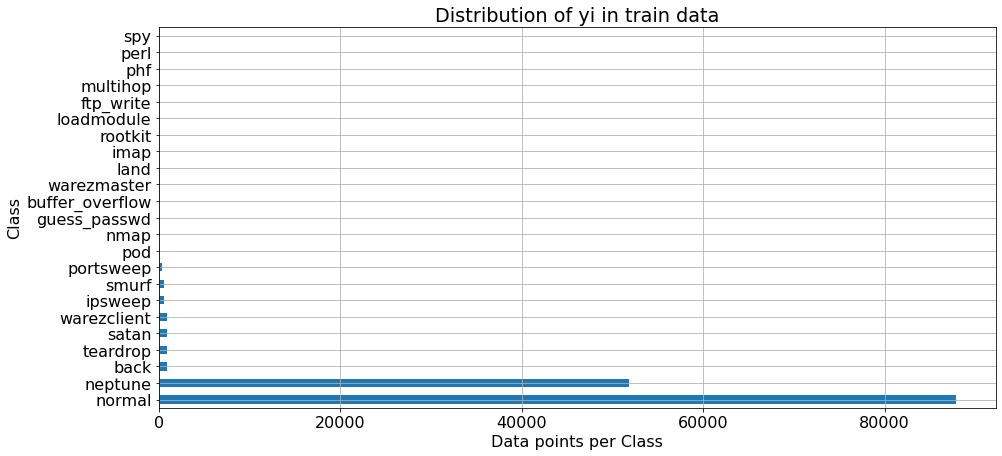

In [30]:
plt.figure(figsize=(15,7))
class_distribution = df['label'].value_counts()
class_distribution.plot(kind='barh')
plt.xlabel('Data points per Class')
plt.ylabel('Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# Creare model

### Predicate

| index | class | 
| --- | --- |
| 0 | normal |
| 1 | smurf |
| 2 | neptune |

In [31]:
class MLP(tf.keras.Model):
    """Model that returns logits."""
    def __init__(self, n_classes, hidden_layer_sizes=(16,16,8)):
        super(MLP, self).__init__()
        self.denses = [tf.keras.layers.Dense(s, activation="elu") for s in hidden_layer_sizes]
        self.dense_class = tf.keras.layers.Dense(n_classes)
        
    def call(self, inputs):
        x = inputs
        for dense in self.denses:
            x = dense(x)
        return self.dense_class(x)

logits_model = MLP(3)
p = ltn.Predicate(ltn.utils.LogitsToPredicateModel(logits_model,single_label=False))

In [32]:
class_normal = ltn.Constant(0, trainable=False)
class_smurf = ltn.Constant(1, trainable=False)
class_neptune = ltn.Constant(2, trainable=False)
# class_bytes = ltn.Constant(3, trainable=False)
# class_srv = ltn.Constant(4, trainable=False)

# Logica si axiomele
```
forall x_normal: C(x_normal,normal): all the non-attacks should have label normal
forall x_smurf: C(x_smurf,smurf): all the smurf attacks should have label smurf
forall x_normal: C(x_neptune,neptune): all the neptune attacks should have label neptune

forall x: ~(C(x,normal) & C(x,smurf)): if an example x is labelled as normal, it cannot be labelled as smurf too;
forall x: ~(C(x,normal) & C(x,neptune)): if an example x is labelled as normal, it cannot be labelled as neptune too;
forall x: ~(C(x,neptune) & C(x,smurf)): if an example x is labelled as neptune, it cannot be labelled as smurf too;
```

In [33]:
Not = ltn.Wrapper_Connective(ltn.fuzzy_ops.Not_Std())
And = ltn.Wrapper_Connective(ltn.fuzzy_ops.And_Prod())
Or = ltn.Wrapper_Connective(ltn.fuzzy_ops.Or_ProbSum())
Implies = ltn.Wrapper_Connective(ltn.fuzzy_ops.Implies_Reichenbach())
Equiv = ltn.Wrapper_Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.And_Prod(),ltn.fuzzy_ops.Implies_Reichenbach()))
Forall = ltn.Wrapper_Quantifier(ltn.fuzzy_ops.Aggreg_pMeanError(p=4),semantics="forall")
Exists = ltn.Wrapper_Quantifier(ltn.fuzzy_ops.Aggreg_pMean(p=6),semantics="exists")

In [34]:
formula_aggregator = ltn.Wrapper_Formula_Aggregator(ltn.fuzzy_ops.Aggreg_pMeanError(p=4))

@tf.function
def axioms(features,label_srcbytes,label_diffsrvrate,label_label):
    x = ltn.Variable("x",features)
    x_normal = ltn.Variable("x_normal",features[label_label=="normal"])
    x_smurf = ltn.Variable("x_smurf",features[label_label=="smurf"])
    x_neptune = ltn.Variable("x_neptune",features[label_label=="neptune"])
    #x_bytes = ltn.Variable("x_bytes",features[label_srcbytes])
    #x_diffsrvrate = ltn.Variable("x_diffsrvrate",features[label_diffsrvrate])
    
    axioms = [
        Forall(x_normal, p([x_normal,class_normal])),
        Forall(x_smurf, p([x_smurf,class_smurf])),
        Forall(x_neptune, p([x_neptune,class_neptune])),

        Forall(x,Not(And(p([x,class_normal]),p([x,class_smurf])))),
        Forall(x,Not(And(p([x,class_normal]),p([x,class_neptune])))),
        Forall(x,Not(And(p([x,class_neptune]),p([x,class_smurf])))),
        
    ]
    sat_level = formula_aggregator(axioms).tensor
    return sat_level

In [35]:
for features, label_srcbytes, label_diffsrvrate, label_label in ds_train:
    print("Initial sat level %.5f"%axioms(features, label_srcbytes, label_diffsrvrate, label_label))
    break

2022-03-23 10:32:08.680368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Initial sat level 0.34823


# Training

In [18]:
metrics_dict = {
    'train_sat_kb': tf.keras.metrics.Mean(name='train_sat_kb'),
    'test_sat_kb': tf.keras.metrics.Mean(name='test_sat_kb'),
    'train_accuracy': tf.keras.metrics.Mean(name="train_accuracy"),
    'test_accuracy': tf.keras.metrics.Mean(name="test_accuracy"),
    'test_sat_phi1': tf.keras.metrics.Mean(name='test_sat_phi1'),
    'test_sat_phi2': tf.keras.metrics.Mean(name='test_sat_phi2'),
    'test_sat_phi3': tf.keras.metrics.Mean(name='test_sat_phi3')
}

@tf.function()
def sat_phi1(features):
    x = ltn.Variable("x",features)
    phi1 = Forall(x, Implies(p([x,class_normal]),Not(p([x,class_smurf]))),p=5)
    return phi1.tensor

@tf.function()
def sat_phi2(features):
    x = ltn.Variable("x",features)
    phi2 = Forall(x, Implies(p([x,class_normal]),p([x,class_smurf])),p=5)
    return phi2.tensor

@tf.function()
def sat_phi3(features):
    x = ltn.Variable("x",features)
    phi3 = Forall(x, Implies(p([x,class_normal]),p([x,class_normal])),p=5)
    return phi3.tensor

def multilabel_hamming_loss(y_true, y_pred, threshold=0.5,from_logits=False):
    if from_logits:
        y_pred = tf.math.sigmoid(y_pred)
    y_pred = y_pred > threshold
    y_true = tf.cast(y_true, tf.int32)
    y_pred = tf.cast(y_pred, tf.int32)
    nonzero = tf.cast(tf.math.count_nonzero(y_true-y_pred,axis=-1),tf.float32)
    return nonzero/y_true.get_shape()[-1]

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
@tf.function
def train_step(features,label_srcbytes,label_diffsrvrate,label_label):
    # sat and update
    with tf.GradientTape() as tape:
        sat = axioms(features,label_srcbytes,label_diffsrvrate,label_label)
        loss = 1.-sat
    gradients = tape.gradient(loss, p.trainable_variables)
    optimizer.apply_gradients(zip(gradients, p.trainable_variables))
    metrics_dict['train_sat_kb'](sat)
    # accuracy
    predictions = logits_model(features)
    label_normal = (label_label == "normal")
    label_smurf = (label_label == "smurf")
    label_neptune = (label_label == "neptune")
    

    onehot = tf.stack([label_normal,label_smurf,label_neptune],axis=-1)
    metrics_dict['train_accuracy'](1-multilabel_hamming_loss(onehot,predictions,from_logits=True))
    
@tf.function
def test_step(features,label_srcbytes,label_diffsrvrate,label_label):
    # sat
    sat_kb = axioms(features,label_srcbytes,label_diffsrvrate,label_label)
    metrics_dict['test_sat_kb'](sat_kb)
    metrics_dict['test_sat_phi1'](sat_phi1(features))
    metrics_dict['test_sat_phi2'](sat_phi2(features))
    metrics_dict['test_sat_phi3'](sat_phi3(features))
    # accuracy
    predictions = logits_model(features)
    label_normal = (label_label == "normal")
    label_smurf = (label_label == "smurf")
    label_neptune = (label_label == "neptune")
    

    onehot = tf.stack([label_normal,label_smurf,label_neptune],axis=-1)
    metrics_dict['test_accuracy'](1-multilabel_hamming_loss(onehot,predictions,from_logits=True))

In [20]:
from collections import defaultdict

def train(
        epochs,
        metrics_dict, 
        ds_train, 
        ds_test, 
        train_step, 
        test_step,
        track_metrics=1,
        csv_path=None,
        scheduled_parameters=defaultdict(lambda : {})
    ):
    """
    Args:
        epochs: int, number of training epochs.
        metrics_dict: dict, {"metrics_label": tf.keras.metrics instance}.
        ds_train: iterable dataset, e.g. using tf.data.Dataset.
        ds_test: iterable dataset, e.g. using tf.data.Dataset.
        train_step: callable function. the arguments passed to the function
            are the itered elements of ds_train.
        test_step: callable function. the arguments passed to the function
            are the itered elements of ds_test.
        csv_path: (optional) path to create a csv file, to save the metrics.
        scheduled_parameters: (optional) a dictionary that returns kwargs for
            the train_step and test_step functions, for each epoch.
            Call using scheduled_parameters[epoch].
    """
    template = "Epoch {}"
    for metrics_label in metrics_dict.keys():
        template += ", %s: {:.4f}" % metrics_label
    if csv_path is not None:
        csv_file = open(csv_path,"w+")
        headers = ",".join(["Epoch"]+list(metrics_dict.keys()))
        csv_template = ",".join(["{}" for _ in range(len(metrics_dict)+1)])
        csv_file.write(headers+"\n")
    
    for epoch in range(epochs):
        for metrics in metrics_dict.values():
            metrics.reset_states()

        for batch_elements in ds_train:
            train_step(*batch_elements,**scheduled_parameters[epoch])
        for batch_elements in ds_test:
            test_step(*batch_elements,**scheduled_parameters[epoch])

        metrics_results = [metrics.result() for metrics in metrics_dict.values()]
        if epoch%track_metrics == 0:
            print(template.format(epoch,*metrics_results))
        if csv_path is not None:
            csv_file.write(csv_template.format(epoch,*metrics_results)+"\n")
            csv_file.flush()
    if csv_path is not None:
        csv_file.close()

In [21]:
EPOCHS = 100
train(
    EPOCHS,
    metrics_dict,
    ds_train,
    ds_test,
    train_step,
    test_step,
    csv_path="results_test.csv",
    track_metrics=20
)

end_time = time.time()


2022-03-23 10:13:44.923070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-23 10:15:05.575489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-23 10:15:06.731463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-23 10:15:20.519026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 0, train_sat_kb: 0.5072, test_sat_kb: 0.7569, train_accuracy: 0.8418, test_accuracy: 0.9799, test_sat_phi1: 0.9971, test_sat_phi2: 0.0853, test_sat_phi3: 0.9587


KeyboardInterrupt: 

In [ ]:
print("It took", end =" ")
total_time = round(end_time-start_time,3)
print(total_time , end ="")
print("s to run")

Text(27.125, 0.5, 'Satisfaction level')

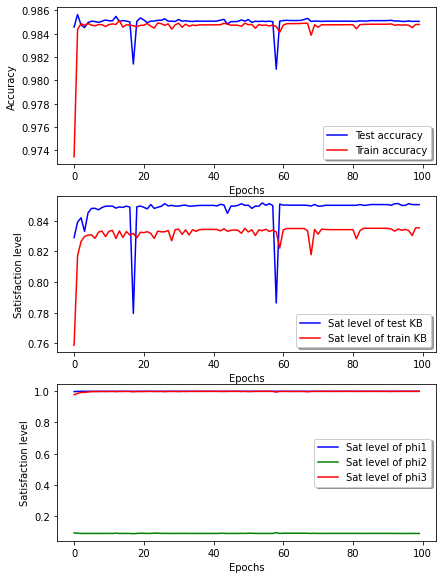

<Figure size 1500x900 with 0 Axes>

In [58]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8

results = pd.read_csv("results_v2.csv", skipinitialspace = True)
fig, ax = plt.subplots(3,1)
fig.tight_layout()
figure(figsize=(10, 6), dpi=150)
ax[0].plot(results['test_accuracy'], color='b', label="Test accuracy")
ax[0].plot(results['train_accuracy'], color='r', label="Train accuracy",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(results['test_sat_kb'], color='b', label="Sat level of test KB")
ax[1].plot(results['train_sat_kb'], color='r',label="Sat level of train KB")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Satisfaction level')

ax[2].plot(results['test_sat_phi1'], color='b', label="Sat level of phi1")
ax[2].plot(results['test_sat_phi2'], color='g',label="Sat level of phi2")
ax[2].plot(results['test_sat_phi3'], color='r',label="Sat level of phi3")
legend = ax[2].legend(loc='best', shadow=True)
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Satisfaction level')